 ###  CTF Challenge: Visual Vortex - Decoding the Anomaly







**Dataset**: [U.S. International Air Traffic Statistics (1990–2023)](https://www.transtats.bts.gov/)  
**Flag Format**: `CTF{Country_Year_Event}`  

 ## 📥 Setup & Data Loading (4 points)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a = pd.read_csv(r"D:\Documents 2\VScode projects\ROBAI2\challenges\data\air_traffic.csv")
a = a.dropna()
a = a.drop_duplicates()
a = a.reset_index(drop=True)
a = a.rename(columns={'Freight (tonnes)': 'Freight'})

# Fixing country names to ensure consistency
a['Country'] = a['Country'].replace({
    'Chinaa': 'China',
    'Chna': 'China',
    'Mexiko': 'Mexico',
    'Germnay': 'Germany',
    'Deutschland': 'Germany',
    'Itly': 'Italy',
    'United States': 'USA',
    'Mehico': 'Mexico',
    'Itlay': 'Italy'
})

# Dropping rows with invalid or inconsistent data
a = a[a['Passengers'] > 0]  
a = a[a['Flights'] > 0]     
a = a[a['Freight'] > 0]     

a = a.reset_index(drop=True)

Number of countries in the dataset: 20
List of countries: ['USA' 'China' 'Italy' 'Mexico' 'Canada' 'Japan' 'Germany'
 'United Kingdom' 'India' 'Brazil' 'Australia' 'South Korea' 'Spain'
 'Netherlands' 'UAE' 'Turkey' 'Singapore' 'Thailand' 'Saudi Arabia'
 'France']


# dataset comprehension  (11 point)

### read and analyse the data then respond to these questions :

### Core Questions (must answer atleast 3 of these!! ) 

1. Which country has the highest total passenger traffic (1990–2023)?  
2. How is passenger traffic distributed across countries?  
3. Which year had the highest and lowest year-over-year (YoY) passenger growth?  
4. What is the average monthly passenger volume across all years?  
5. How is air freight volume distributed globally?  

### Bonus Questions  

1. What is the average number of passengers per flight for each country?  
2. Which country has the highest number of recorded flights?  
3. Which month historically has the highest air traffic volume?  

### Advanced Bonus Questions  

1. Which country shows the strongest correlation between passenger traffic and freight volume?  
2. Are there seasonal patterns in air traffic for specific countries?  
3. Which country recovered fastest to pre-COVID (2019) passenger levels post-2020?  

Country with highest total passenger traffic: United States (577375553.0)


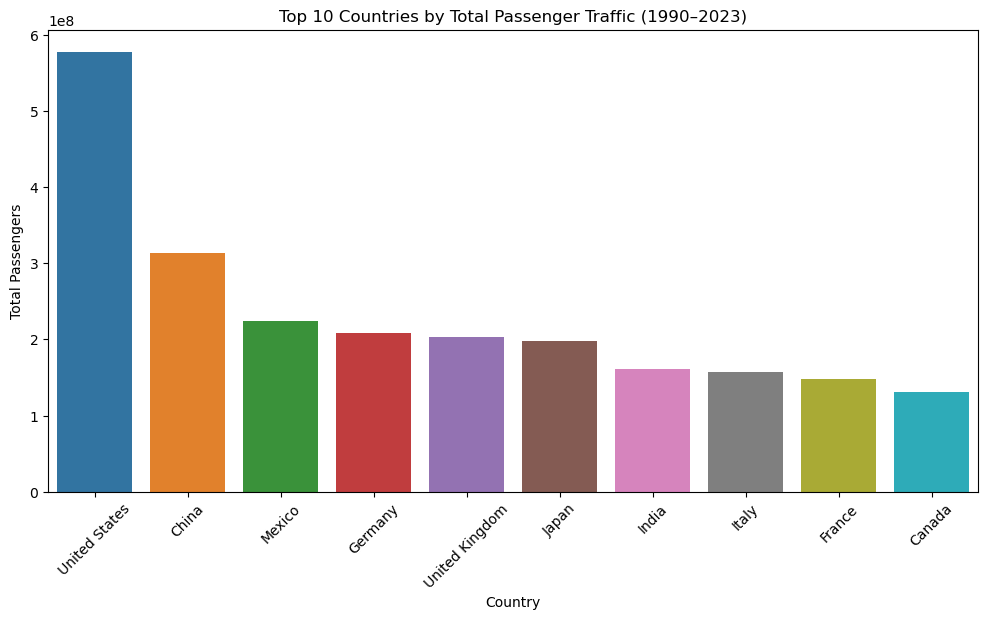

Year with highest YoY passenger growth: 2022
Year with lowest YoY passenger growth: 2020
Average monthly passenger volume: 378628.19


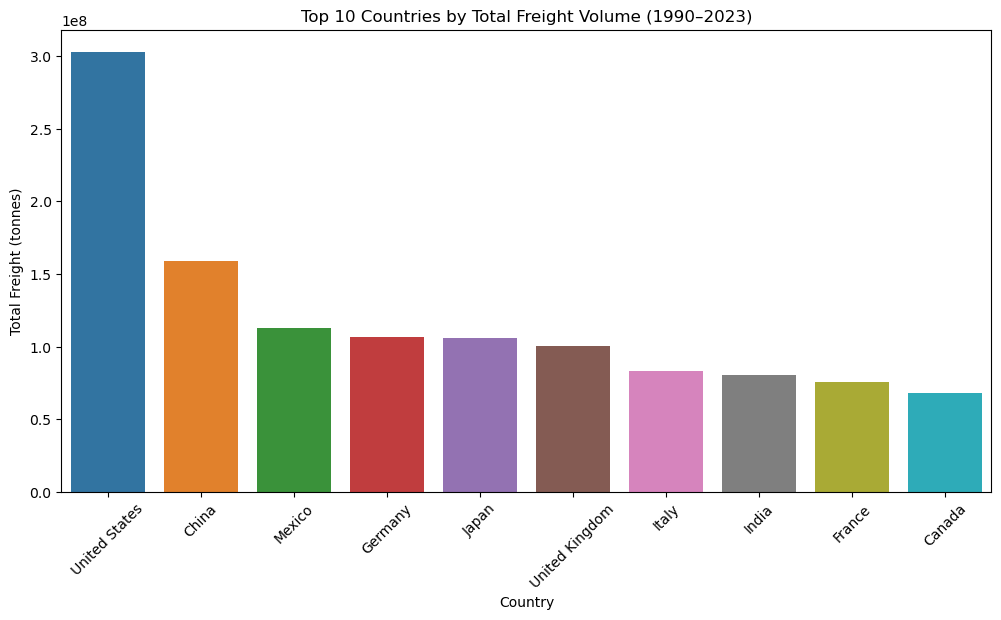

In [ ]:
# 1. country with the highest total passenger traffic (1990–2023)
total_passengers_by_country = a.groupby('Country')['Passengers'].sum()
highest_passenger_country = total_passengers_by_country.idxmax()
highest_passenger_traffic = total_passengers_by_country.max()
print(f"Country with highest total passenger traffic: {highest_passenger_country} ({highest_passenger_traffic})")

# 2. passenger traffic distribution across countries
plt.figure(figsize=(12, 6))
sns.barplot(x=total_passengers_by_country.nlargest(10).index, y=total_passengers_by_country.nlargest(10).values)
plt.title("Top 10 Countries by Total Passenger Traffic (1990–2023)")
plt.ylabel("Total Passengers")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

# 3. year witht the highest and lowest year-over-year (YoY) passenger growth
a['Total_Passengers_Per_Year'] = a.groupby('Year')['Passengers'].transform('sum')
a['YoY_Growth'] = a['Total_Passengers_Per_Year'].pct_change() * 100
highest_growth_year = a.loc[a['YoY_Growth'].idxmax(), 'Year']
lowest_growth_year = a.loc[a['YoY_Growth'].idxmin(), 'Year']
print(f"Year with highest YoY passenger growth: {highest_growth_year}")
print(f"Year with lowest YoY passenger growth: {lowest_growth_year}")

# 4. average monthly passenger volume across all years
average_monthly_passenger_volume = a['Passengers'].mean()
print(f"Average monthly passenger volume: {average_monthly_passenger_volume:.2f}")

# 5. air freight volume distribution globally
total_freight_by_country = a.groupby('Country')['Freight'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=total_freight_by_country.nlargest(10).index, y=total_freight_by_country.nlargest(10).values)
plt.title("Top 10 Countries by Total Freight Volume (1990–2023)")
plt.ylabel("Total Freight (tonnes)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

 ## 🧩 Part 1: Data Inspection (5 points)
 **Q1** : How many missing values exist in the `Passengers` and `Flights` columns?  
 **Q2** : What is the time range of the dataset?

## 🛠️ Part 2: Data Augmentation  (10 points)
 **Q3**: Clean the dataset. Justify your strategy.  
 **Q4**: Create `Passengers_per_Flight` and `YoY_Growth`. What do they measure?

## 📈 Part 3: Time Series Visualization (10 point)
 **Q5**: Plot passenger trends for a country. What anomalies exist?  
 **Q6**: Add a rolling average. What long-term trend emerges?

## 🌍 Part 4: Geospatial Visualization (recommended) (10 points)
 **Q7**: Map freight volume by country. Which regions are outliers?  
 **Q8**: Did freight to China drop in 2022?

## 🔗 Part 5: Correlation Analysis (10 points)
 **Q9**: Are passengers, flights, and freight strongly correlated?  
 **Q10**: Do clusters emerge in the 3D plot?

## 🚨 Part 6: Anomaly Detection (15 points)
 **Q11**: What’s the worst YoY passenger drop?  
 **Q12**: What event caused it?

## 🏁 Part 7: Flag Submission (30 point)
**Q13**: Submit your flag as `CTF{Country_Year_Event}`.


 ## 🎯 Bonus Points (Advanced Techniques)
 **Extra credit will be awarded for implementing the following methods:**  

        * **Dimensionality Reduction (PCA)**

        * **Time Series Decomposition**

        * **Clustering (K-Means/DBSCAN)**  

        
 ---
 **Scoring Boost**:  
 - **+15%**: For implementing PCA + Clustering  
 - **+10%**: For time series decomposition or automated anomaly detection
 - **+20%**: for  creative / original ideas or implimentations  (justifications and context  will also be considered )
 